### Final Project
#### Bianca Amoako
#### 11/22/2024

I am interested in looking at the data available from the youth prisons in Ohio. Underneath the [Ohio Department of Youth Services](https://dys.ohio.gov/wps/portal/gov/dys/home), there are three youth prisons in Ohio that are accredited by the American Correctional Association. The three facilities are:
-  Cuyahoga Hills Juvenile Correctional Facility (CHJCF)
-  Indian River Juvenile Correctional Facility (IRJCF)
-  Circleville Juvenile Correctional Facility (CJCF)

All three facilities serve only male youth and have a variety of programs to reform the youth population admitted.

![](map_facilities.png)

---
#### DataOhio dataset [Youth Services Current Facility Population](https://data.ohio.gov/wps/portal/gov/data/view/youth-services-current-facility-population?visualize=true) 
This data shows the current population (as of November 22, 2024) of all of the correctional facilities in Ohio. I selected the three youth prisons and their race break down and exported it as a pdf file, which was the only option for the data on DataOhio. To convert the pdfs to csv files I will use the tabula-py and the function .convert_into(). This will take the pdf file name and return a csv file to my directory. I will turn those csv files into a Pandas DataFrame using .DataFrame(pd.read_csv()) with the csv file from Tabula

In [263]:
import tabula
import pandas as pd

In [264]:
tabula.convert_into("cuyahoga_by_race.pdf", "cuya_by_race.csv", output_format="csv", pages='all')
cuyah_race_df = pd.DataFrame(pd.read_csv("cuya_by_race.csv"))
#tidy
cuyah_race_df["Facility"] = "CHJCF"
cuyah_race_df.loc[3, "Race"] = "Mixed-Race"
cuyah_race_df = cuyah_race_df.drop(5)
cuyah_race_df = cuyah_race_df.rename(columns={"Current\rPopulation": "Current Population"})
cuyah_race_df

,Race,Current Population,Facility,Total
0,White,19,CHJCF,19
1,Black,153,CHJCF,172
2,Hispanic,7,CHJCF,179
3,Mixed-Race,5,CHJCF,184
4,Asian,1,CHJCF,185


In [265]:
tabula.convert_into("indian_river_by_race.pdf", "indian_by_race.csv", output_format="csv", pages='all')
indian_race_df = pd.DataFrame(pd.read_csv("indian_by_race.csv"))
#tidy
indian_race_df["Facility"] = "IRJCF"
indian_race_df.loc[4, "Race"] = "American Indian"
indian_race_df = indian_race_df.drop(5)
indian_race_df = indian_race_df.rename(columns={"Current\rPopulation": "Current Population"})
indian_race_df

,Race,Current Population,Facility,Total
0,White,28,IRJCF,28
1,Black,113,IRJCF,141
2,Hispanic,8,IRJCF,149
3,Mixed-Race,5,IRJCF,154
4,American Indian,1,IRJCF,155


In [266]:
tabula.convert_into("circleville_by_race.pdf", "circle_by_race.csv", output_format="csv", pages='all')
circle_race_df = pd.DataFrame(pd.read_csv("circle_by_race.csv"))
#tidy
circle_race_df["Facility"] = "CJCF"
circle_race_df.loc[4, "Race"] = "American Indian"
circle_race_df = circle_race_df.drop(5)
circle_race_df = circle_race_df.rename(columns={"Current\rPopulation": "Current Population"})
circle_race_df

,Race,Current Population,Facility
0,White,30,CJCF
1,Black,107,CJCF
2,Hispanic,6,CJCF
3,Mixed-Race,2,CJCF
4,American Indian,2,CJCF


#### Race Breakdown as Pie Charts
To visualize the race breakdowns for the three youth prisons, I will use matplotlib's pie chart function .pie() and numpy to help generate colors from a pre-defined colormap.

In [267]:
from matplotlib import pyplot as plt
import numpy as np

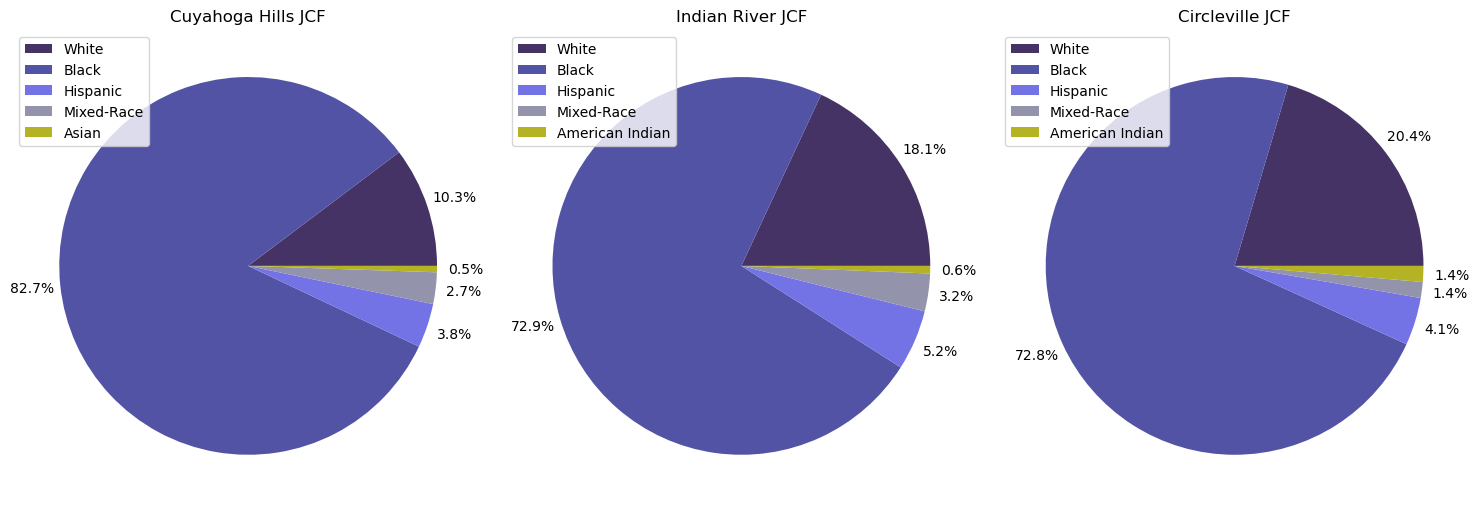

In [268]:
fig1, ax1 = plt.subplots(1,3, figsize = (15, 20))
colors_ = plt.get_cmap('gist_stern')(np.linspace(0.2, 0.7, len(cuyah_race_df)))
#Cuyahoga Pie
ax1[0].pie(cuyah_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[0].set_title("Cuyahoga Hills JCF")
ax1[0].legend(cuyah_race_df["Race"], loc = "upper left")

#Indian River Pie
ax1[1].pie(indian_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[1].set_title("Indian River JCF")
ax1[1].legend(indian_race_df["Race"], loc = "upper left")


#Circleville Pie
ax1[2].pie(circle_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[2].set_title("Circleville JCF")
ax1[2].legend(circle_race_df["Race"], loc = "upper left")

fig1.tight_layout()
plt.show()

#### There's clearly a much greater number of Black or African Americans admitted to these correctional facilities as shown in the pie charts above. 
#### Hypothesis: African American admissions have a majority offense that leads to their placements across the three youth prisons.
-------
#### DataOhio has a subset of up-to-date data files that describe how many of the youth are admitted due to sex offenses, gun offenses, and how long they've been in the facility for said offenses. 
In Ohio, a sexual offense is a crime that involves sexual conduct or the possession of illegal sexual material.
In Ohio, a gun offense can be any illegal act involving a firearm. For example, possessing a gun without a permit or discharging a firearm in public. Minors are not allowed to possess guns.

After importing the pdf and turning them into csv files, I am merging the main DataFrame for each youth prison with columns that represent the count of sex and gun offenses. I will show Circleville JCF and perform the same operations for Cuyahoga and Indian River JCF in one code block after.

In [269]:
#Sexual offenses Circleville JCF
tabula.convert_into("Circleville_sex_off_youth.pdf", "circle_sexoff_race.csv", output_format="csv", pages='1')
circle_sexoff_df = pd.DataFrame(pd.read_csv("circle_sexoff_race.csv"))
circle_sexoff_df = circle_sexoff_df.drop(3).rename(columns={"Current\rPopulation": "Sex Offenses"})
circle_sexoff_df 

,Race,Sex Offenses
0,White,10
1,Black,5
2,Hispanic,2


In [270]:
#Gun offenses Circleville JCF
tabula.convert_into("circle_gun_off_youth.pdf", "circle_gunoff_race.csv", output_format="csv", pages='1')
circle_gunoff_df = pd.DataFrame(pd.read_csv("circle_gunoff_race.csv"))
circle_gunoff_df = circle_gunoff_df.drop(4).rename(columns={"Current\rPopulation": "Gun Offenses"})
circle_gunoff_df

,Race,Gun Offenses
0,White,8
1,Black,68
2,Hispanic,3
3,American Indian,1


In [289]:
circle_race_df = pd.merge(circle_race_df, circle_sexoff_df, how = "outer").merge(circle_gunoff_df, how = "outer")
circle_race_df.fillna(0, inplace = True)
circle_race_df

,Race,Current Population,Facility,Sex Offenses,Gun Offenses
0,American Indian,2,CJCF,0.0,1.0
1,Black,107,CJCF,5.0,68.0
2,Hispanic,6,CJCF,2.0,3.0
3,Mixed-Race,2,CJCF,0.0,0.0
4,White,30,CJCF,10.0,8.0


I will repeat the steps above for Cuyahoga and Indian River

In [ ]:
'''tabula.convert_into("Circleville_sex_off_youth.pdf", "circle_sexoff_time.csv", output_format="csv", pages='3')
circle_sexoff_time_df = pd.DataFrame(pd.read_csv("circle_sexoff_time.csv"))
circle_sexoff_time_df'''

#### Circleville Race Population and Offenses for African Americans, Whites, and Hispanics

In [302]:
afr = circle_race_df["Sex Offenses"], circle_race_df["Gun Offenses"]

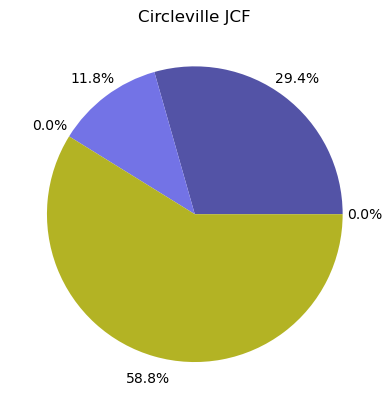

In [311]:
# 3 pie charts African American, Hispanic, White. Each pie chart shows gun or sex offense or other. 
fig2, ax2 = plt.subplots()
#African American Pie
ax2.pie(circle_race_df["Sex Offenses"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax2.set_title("Circleville JCF")

plt.show()

How does it connect to the broader population of adult incarceration or all of Ohio?